<a href="https://colab.research.google.com/github/Graviton12/CS-430-Group-Project/blob/main/2024_Cherokee_Invasive_Survey_EDA_samia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cherokee Park 2024 Invasive Survey Exploratory Data Analysis
## CS-430 Machine Learning in the Cloud
### Ty Johnson, Samia Mahmood, Tyler Lericos, and Chase Hall

## Data Preprocessing - 2024 Data

In [ ]:
# importing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# loading dataset
# using skiprows=1 to skip the first row of the dataset
dataset=pd.read_excel("/content/drive/MyDrive/CS 430 Group Project/olmstead_dataset.xlsx", sheet_name="2024 Cherokee Invasive Survey", skiprows=1)

### Understanding the Dataset

In [ ]:

dataset

,Comment,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,Cherokee1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,Cherokee2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,Cherokee3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN
3,Cherokee4,13.0,3,4,6,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,NaN,1.0
4,Cherokee5,15.0,12,3,20,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Cherokee169,14.0,5,12,5,9.36,90.64,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw",1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8,0.0,0.0
143,Cherokee170,30.0,26,28,35,30.94,69.06,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,",0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,2.0,8,0.0,0.0
144,Cherokee171,31.0,12,35,16,24.44,75.56,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,",1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9,0.0,0.0
145,Cherokee172,20.0,80,16,26,36.92,63.08,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,",3.0,...,0.0,0.0,0.0,4.0,1.0,2.0,0.0,18,0.0,0.0


In [ ]:
# checking the datatypes for each column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Comment                                    147 non-null    object 
 1   N                                          146 non-null    float64
 2   E                                          147 non-null    int64  
 3   S                                          147 non-null    int64  
 4   W                                          147 non-null    int64  
 5   Calculated using formula in densiometer    145 non-null    float64
 6   Calculated using formula in densiometer.1  145 non-null    float64
 7   Canopy                                     147 non-null    object 
 8   Understory                                 147 non-null    object 
 9   Lonicera japonica                          146 non-null    float64
 10  Microstegium vimineum     

In [ ]:
# Viewing the summary statistics for the dataset
dataset.describe()

,N,E,S,W,Calculated using formula in densiometer,Calculated using formula in densiometer.1,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
count,146.000000,147.000000,147.000000,147.000000,145.000000,145.000000,146.000000,146.000000,146.000000,146.000000,...,146.0,146.000000,146.000000,146.000000,146.000000,145.000000,114.000000,147.000000,67.000000,54.000000
mean,8.828767,8.544218,7.952381,9.299320,8.935034,91.064966,1.219178,0.404110,0.136986,1.239726,...,0.0,1.123288,1.143836,1.438356,0.184932,0.200000,0.684211,10.394558,0.074627,0.092593
std,11.567707,12.116575,9.148196,13.985518,10.124934,10.124934,1.262145,0.851601,0.417383,1.193689,...,0.0,1.280573,1.499378,1.010105,0.525271,0.672888,0.962259,4.810886,0.401264,0.558587
min,0.000000,0.000000,0.000000,0.000000,0.000000,38.900000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,2.000000,2.000000,2.340000,88.820000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000
50%,4.500000,4.000000,4.000000,5.000000,5.200000,94.800000,1.000000,0.000000,0.000000,1.000000,...,0.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,10.000000,0.000000,0.000000
75%,12.000000,12.000000,11.000000,11.000000,11.180000,97.660000,2.000000,0.000000,0.000000,2.000000,...,0.0,2.000000,2.000000,2.000000,0.000000,0.000000,1.000000,14.000000,0.000000,0.000000
max,80.000000,81.000000,38.000000,94.000000,61.100000,100.000000,4.000000,4.000000,3.000000,4.000000,...,0.0,4.000000,5.000000,4.000000,3.000000,4.000000,3.000000,26.000000,3.000000,4.000000


In [ ]:
# renaming columns
dataset = dataset.rename(columns={'Calculated using formula in densiometer':'average_canopy_cover', 'Calculated using formula in densiometer.1':'form_densiometer.1'})

In [ ]:
# checking if columns were renamed
dataset

,Comment,N,E,S,W,average_canopy_cover,form_densiometer.1,Canopy,Understory,Lonicera japonica,...,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus,Canopy gap and/or downed trees present,SUM,Dioscorea polystachya,Unnamed: 27
0,Cherokee1,12.0,3,5,7,7.02,92.98,"Walnut, maple, mulberry, locust","Boxelder, maple, hackberry",1.0,...,0.0,1.0,3.0,3.0,0.0,0.0,2.0,20,NaN,NaN
1,Cherokee2,3.0,0,2,2,1.82,98.18,"Cherry, hackberry, maple","Maple, buckeye, locust",4.0,...,0.0,1.0,1.0,3.0,0.0,0.0,0.0,15,NaN,NaN
2,Cherokee3,1.0,0,4,5,2.60,97.40,"Oak, basswood, maple","Maple, ash",3.0,...,0.0,0.0,1.0,3.0,0.0,0.0,1.0,10,NaN,NaN
3,Cherokee4,13.0,3,4,6,6.76,93.24,"Locust, walnut, sycamore","Ash, hackberry, boxelder",1.0,...,0.0,4.0,2.0,1.0,0.0,2.0,1.0,19,NaN,1.0
4,Cherokee5,15.0,12,3,20,13.00,87.00,"Oak, maple, locust","Ash, hackberry, viburnum",0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Cherokee169,14.0,5,12,5,9.36,90.64,"Hackberry, walnut, basswood","Redbud, box elder, serviceberry, pawpaw",1.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,8,0.0,0.0
143,Cherokee170,30.0,26,28,35,30.94,69.06,"Willow oak, chestnut oak, elm, hickory, maple,...","Redbud, cedar, ash,",0.0,...,0.0,1.0,0.0,2.0,0.0,0.0,2.0,8,0.0,0.0
144,Cherokee171,31.0,12,35,16,24.44,75.56,"Oaks: chestnut, red, white, maple, walnut, hac...","Maple, redbud, ash, cedar,",1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,9,0.0,0.0
145,Cherokee172,20.0,80,16,26,36.92,63.08,"Chestnut oaks, hickory, walnut, maple, red oak,","Redbud, ash, hickory, hackberry,",3.0,...,0.0,0.0,0.0,4.0,1.0,2.0,0.0,18,0.0,0.0


In [ ]:
dataset.columns

Index(['Comment', 'N', 'E', 'S', 'W', 'average_canopy_cover',
       'form_densiometer.1', 'Canopy', 'Understory', 'Lonicera japonica',
       'Microstegium vimineum', 'Euonymus alatus',
       'Ampelopsis brevipedunculata', 'Morus alba', 'Celastrus orbiculatus',
       'Vinca minor', 'Euonymus fortunei', 'Akebia quinata',
       'Fallopia japonica', 'Achyranthes', 'Hederea helix', 'L. maackii',
       'Privet/ Ligustrum', 'Ailanthus',
       'Canopy gap and/or downed trees present', 'SUM',
       'Dioscorea polystachya', 'Unnamed: 27'],
      dtype='object')

In [ ]:
# deleting uneeded columns
dataset = dataset.drop(['Unnamed: 27', 'N', 'E', 'S', 'W', 'Canopy gap and/or downed trees present', 'SUM', 'Canopy', 'Understory', 'Dioscorea polystachya'], axis=1)

In [ ]:
# checking for any missing values
dataset.isna().sum()

,0
Comment,0
average_canopy_cover,2
form_densiometer.1,2
Lonicera japonica,1
Microstegium vimineum,1
Euonymus alatus,1
Ampelopsis brevipedunculata,1
Morus alba,1
Celastrus orbiculatus,1
Vinca minor,1


### Handling missing values

In [ ]:
#filling out missing values for all columns with 0
dataset.fillna(0, inplace=True)

In [ ]:
# handling missing values for North column using mean (numerical column)
#dataset = dataset.fillna({'form_densiometer': dataset['form_densiometer'].mean()})
#dataset = dataset.fillna({'form_densiometer.1': dataset['form_densiometer.1'].mean()})

In [ ]:
# columns with missing species values
#species_missing_vals = dataset.columns[3:23]
#species_missing_vals

In [ ]:
# handling missing values for Species using mode (Categorical columns)
#for column in species_missing_vals:
    #mode_value = dataset[column].mode()[0]  # Get the mode for the column
    #dataset[column].fillna(mode_value, inplace=True)

In [ ]:
# chekcing if values were filled
dataset.isna().sum()

,0
Comment,0
average_canopy_cover,0
form_densiometer.1,0
Lonicera japonica,0
Microstegium vimineum,0
Euonymus alatus,0
Ampelopsis brevipedunculata,0
Morus alba,0
Celastrus orbiculatus,0
Vinca minor,0


## EDA Questions

### Do a majority of the invasive species occur frequently? Meaning, is there a major presence of invasive species?


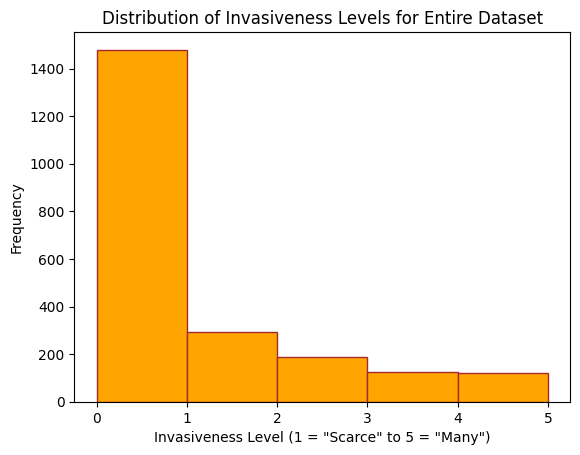

In [ ]:
# creating histogram for the distribution of invaseness levels

# focusing on the tree species columns from the dataset
invasiveness_values = dataset[['Lonicera japonica', 'Microstegium vimineum',
       'Euonymus alatus', 'Ampelopsis brevipedunculata', 'Morus alba',
       'Celastrus orbiculatus', 'Vinca minor', 'Euonymus fortunei',
       'Akebia quinata', 'Fallopia japonica', 'Achyranthes', 'Hederea helix',
       'L. maackii', 'Privet/ Ligustrum', 'Ailanthus']].values.flatten()

# plotting the histogram
plt.hist(invasiveness_values, bins=5, color='orange', edgecolor='brown')

# setting the title
plt.title('Distribution of Invasiveness Levels for Entire Dataset')
# setting the x label
plt.xlabel('Invasiveness Level (1 = "Scarce" to 5 = "Many")')
plt.xticks(np.arange(0,6))
# setting the y label
plt.ylabel('Frequency')

# displaying plot
plt.show()

The histogram shows that for the invasive species in the 2024 Cherokee Invasive Survey dataset as a whole, the majority of the occurances of these invasive speces were within the "scarce" level while the fewest number of occurences were within the "many" level. This implies that for the invasise species in Cherokee park in 2024, the occruances of seeing these invasive species is mostly scarce. This is potienlly a good sign as it shows that a majority of the invasive species do not occur very frequently.

### For all invasive species in the dataset, which invasive species occur most freuquently and may pose the greatest threat?

In [ ]:
# creatig a copy of the dataset but only focusing on the invasive species rows
invasive_species_dataset = dataset.iloc[:,3:23]
#invasive_species_dataset

# adding a row to the dataet which sums the values for each invasise species and sorting it from greatest to smallest
invasive_species_sum = invasive_species_dataset.sum().sort_values(ascending=True)
invasive_species_dataset.loc['sum'] = invasive_species_sum
invasive_species_dataset

,Lonicera japonica,Microstegium vimineum,Euonymus alatus,Ampelopsis brevipedunculata,Morus alba,Celastrus orbiculatus,Vinca minor,Euonymus fortunei,Akebia quinata,Fallopia japonica,Achyranthes,Hederea helix,L. maackii,Privet/ Ligustrum,Ailanthus
0,1.0,2.0,0.0,3.0,0.0,4.0,0.0,3.0,0.0,0.0,1.0,3.0,3.0,0.0,0.0
1,4.0,0.0,1.0,1.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,1.0,3.0,0.0,0.0
2,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0
3,1.0,1.0,0.0,4.0,0.0,0.0,0.0,4.0,0.0,0.0,4.0,2.0,1.0,0.0,2.0
4,0.0,0.0,0.0,2.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,0.0,0.0,0.0,2.0,0.0,0.0,0.0,3.0,0.0,0.0,1.0,0.0,2.0,0.0,0.0
144,1.0,0.0,0.0,1.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
145,3.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.0,1.0,2.0
146,1.0,0.0,3.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0


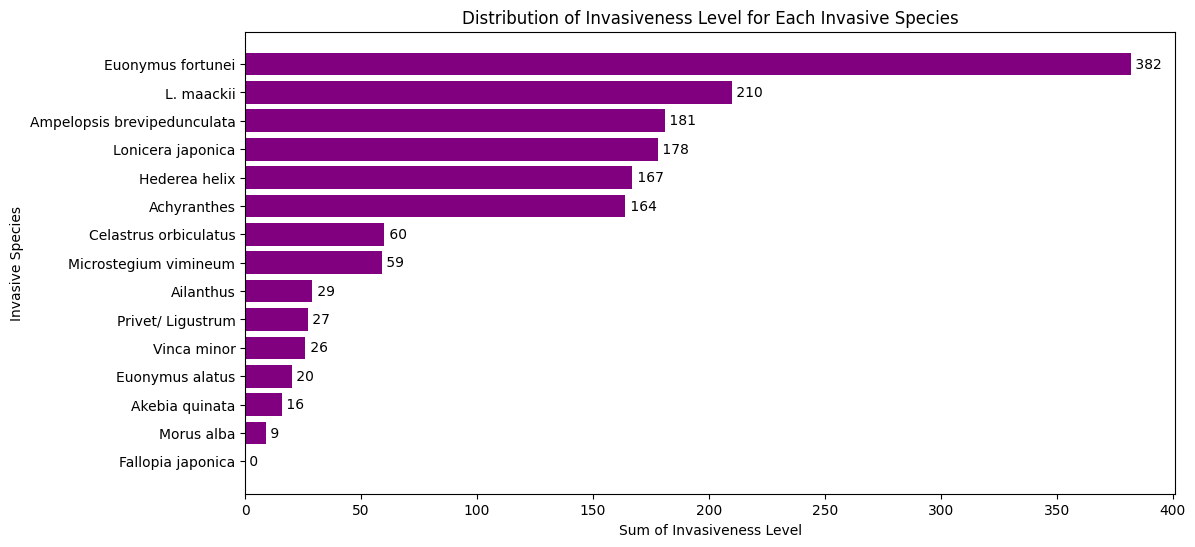

In [ ]:
plt.figure(figsize=(12, 6))

# creating a bar graph to display the invasive level for each invasive species using the sum row
bar_graph = plt.barh(invasive_species_sum.index, invasive_species_sum.values, color='purple')

plt.title('Distribution of Invasiveness Level for Each Invasive Species')
plt.xlabel('Sum of Invasiveness Level')
plt.ylabel('Invasive Species')

# Add the sum values as labels on the bars
for bar in bar_graph:
    # Getting the sum caue for each bar
    bar_sum_value = bar.get_width()
    # setting the postion for the label for each bar
    plt.text(bar_sum_value + 0.1, bar.get_y() + bar.get_height()/2,
             f'{bar_sum_value: .0f}', va='center')  # The value label

# Display the plot
plt.show()

For the 2024 Cherokee Park dataset, based on the bar graph, the Euonymus Fortunei species had the most occurances with a value of 382. Therefore, this species may pose the greatest threat for the park in terms of its level of invaseness. L. maackii had the second highest number of occurances with a value of 210 however this was substantionally smaller that Euonymus Fortunei. Moreover, the Fallopia Japonica species had no occurances. Therefore, this species does not seem to pose a threat at this moment.